# UFCFVQ-15-M Programming for Data Science (Autumn 2021)
# Programming Task 2

## Student Id: 

### Requirement FR9 - Read CSV data from two files and merge it into a single Data Frame 

In [15]:
# add code here

# Importing the necessary library
import pandas as pd 


# Reading the csv files
df1 = pd.read_csv('task2a.csv')
df2 = pd.read_csv('task2b.csv')

# Merging the two csv files on the region column into one csv file called new_df. 
merged_df = pd.merge(df1, df2, on="region")
merged_df.head()
# cleaned_df

,region,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_to_the_right,avg_biascrimes_per_100k
0,1,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,1.806410
1,2,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,1.656700
2,3,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,3.413928
3,4,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.869209
4,5,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,2.397986


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR10 - Clean the merged data

In [16]:
# add code here

# Dropping all the rows in the new dataframe that have missing values. 
dropped_na_df = merged_df.dropna()

# Dropping the unnessary share_voters_voted_to_the_right column
cleaned_df = dropped_na_df.drop(columns= ['share_voters_voted_to_the_right'])


# Printing the values to confirm that the column has been properly dropped.
cleaned_df.head()



,region,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,avg_biascrimes_per_100k
0,1,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,1.806410
1,2,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,1.656700
2,3,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,3.413928
3,4,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.869209
4,5,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,2.397986


<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR11 - Investigate the effects of household income on levels of bias crimes

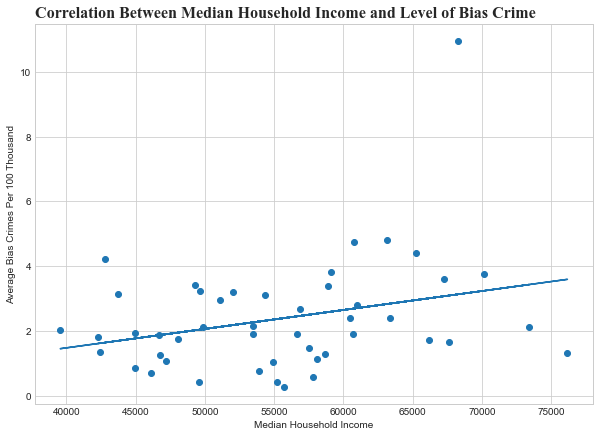

In [19]:
# add code here

# Importing the necessary library
import matplotlib.pyplot as plt
import numpy as np
# Setting the aesthetic style
plt.style.use('seaborn-whitegrid')
# Set the plots to be directly stored in the notebook
%matplotlib inline

# Setting the figure size 
fig = plt.figure(figsize = (10, 7))
x = cleaned_df['median_household_income']
y = cleaned_df['avg_biascrimes_per_100k']

# Produce the scatter plot while specifying the x and y axis 
plt.scatter(x, y, marker='o')


# Give the plot a title. 
plt.title("Correlation Between Median Household Income and Level of Bias Crime", loc = 'left', 
fontname="Times New Roman", size=16,fontweight="bold")

# Label the x-axis 
plt.xlabel("Median Household Income")
# Label the y-axis 
plt.ylabel("Average Bias Crimes Per 100 Thousand")

# Adding a linear regression line to help with interpretation.
slope, intercept = np.polyfit(x, y, 1) 
plt.plot(x, slope*x+intercept);

# Since we are working in a IPython shell, plt.show() is unnecessary, hence, I will not be using it. 


# Higher bias crimes with increase in income. However it isn't significant as the correlation is very low.
# pd.DataFrame(new_df.corr()['avg_biascrimes_per_100k'].sort_values())

From the graph above and the linear regression line above, it can be assumed that there is some correlation beween Median Household Income and Average Bias crimes per 100k. Looking at the scatter plot, the average number of bias crimes seem to increase as the median household income increases. From the direction of the linear regression line as well, we can also see the correlation as well as see that it is positive. 

There is also an outlier around 68000 household income.

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR12 - Test the hypothesis that household income has no effect on levels of bias crime

In [18]:
# Calculating the correllation coefficient using pearsonr in the scipy.stats function.
# I am using Pearson’s correlation which is the standard correlation coefficient
from scipy.stats import pearsonr
x = cleaned_df['median_household_income']
y = cleaned_df['avg_biascrimes_per_100k']

# Correlating the two columns
corr, p_value = pearsonr(x, y)
# Printing the correlation of the two columns
print(f'The correlation between the two columns is {corr}, the p value from the hypothesis test is {p_value}')

The correlation between the two columns is 0.2958187026076811, the p value from the hypothesis test is 0.04350240682185771


From the value I have gotten from the correlation between household income and bias crime, it is revealed that there is a positive correlation, between the two columns, also, looking at the p-value from this output, since the value is below 0.05, it indicates that there is a correlation between household income and bias crime, hence, we reject the hypothesis that household income has no effect on the level of bias crime. It can therefore be concluded that the hypothesis is not valid. 

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR13 - Investigate the effects of urbanisation on levels of bias crimes

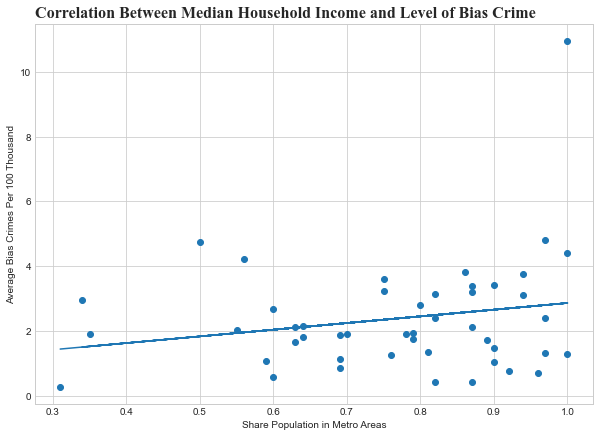

In [6]:
# add code here
# add code here

# Importing the necessary library
import matplotlib.pyplot as plt
# Setting the aesthetic style
plt.style.use('seaborn-whitegrid')
# Set the plots to be directly stored in the notbook
%matplotlib inline

# Setting the figure size 
fig = plt.figure(figsize = (10, 7))

# Produce the scatter plot while specifying the x and y axis 
plt.scatter(cleaned_df['share_population_in_metro_areas'], cleaned_df['avg_biascrimes_per_100k'], marker='o')


# Give the plot a title. 
plt.title("Correlation Between Median Household Income and Level of Bias Crime", loc = 'left', 
fontname="Times New Roman", size=16,fontweight="bold")

# Label the x-axis 
plt.xlabel("Share Population in Metro Areas")
# Label the y-axis 
plt.ylabel("Average Bias Crimes Per 100 Thousand")

# Adding a linear regression line to help with interpretation.
slope, intercept = np.polyfit(cleaned_df['share_population_in_metro_areas'], cleaned_df['avg_biascrimes_per_100k'], 1) 
plt.plot(cleaned_df['share_population_in_metro_areas'], slope*cleaned_df['share_population_in_metro_areas']+intercept);



From the graph above and the linear regression line above, it can be assumed that there is no significant correlation beween the share of the population in the metro areas and Average Bias crimes per 100k. As there is no significant difference in the average bias crime of low populated areas and the high populated areas. 

From the graph, we can also see that as the share population in metro area increases, there is a higher cluster of bias crimes. This is expected as the bias crime is a function of 100,000 of the population, more population means more bias crimes, but on an average, the bias crimes are almost at the same level as those of the less populated areas. 

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

### Requirement FR14 - Test the hypothesis that urbanisation has a significant effect on levels of bias crimes

In [14]:
# add code here

# Calculating the correllation coefficient using pearsonr in the scipy.stats function.
# I am using Pearson’s correlation which is the standard correlation coefficient
from scipy.stats import pearsonr
x = cleaned_df['share_population_in_metro_areas']
y = cleaned_df['avg_biascrimes_per_100k']

# Correlating the two columns
corr, p_value = pearsonr(x, y)
# Printing the correlation of the two columns
print(f'The correlation between the two columns is {corr}, the p value from the hypothesis test is {p_value}')


The correlation between the two columns is 0.2094627680978497, the p value from the hypothesis test is 0.1576360341620947


From the value which I have gotten from the correlation between the degree of urbanisation and bias crime, it is revealved that there is a positive correllation between the two columns. However, from the p-value which is greater than 0.05 the correlation coefficient is not statitically significant, hence it can be concluded that the share of population in metro area (degree of urbanization) has no significant effect on bias crime. Hence, we reject the hypothesis that urbanization has a significant effect on level of bias crime. 

<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Coding Standards
<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>

# Process Development Report for Task 2


### REFLECTIVE REPORT ON TASK 2. 

The purpose of this task was to test my use of NumPy/SciPy, Pandas, and Matplotlib/Seaborn to combine, clean and analyze two datasets related to bias crime. The tutor provided us with two datasets containing background information about the residents of 51 regions, as well as information about bias crimes (per 100,000 residents) for each region.

Reading in the csv files was quite straightforward as I had done this numerous times. In this occasion, I opted to use pandas to read in the csv files. I could have used numpy as well for this, however, Pandas is specially designed to handle large datasets and it is also easily customizable. I loaded the two csv files into two separate dataframes. 

The next task was to merge the two dataframes into one dataframe. Before doing that, I examined the files and realized that they had one column in common (region). I found out that I couldn’t use the concatenate function in pandas (pd.concat) but the merge function. I specified that the dataframes should be merged on the region column. This automatically meant that only one of the columns will remain. 

The next task involved dropping the missing values as well as the unnecessary column. I achieve these two by equating my output to a new variable. I could also have done these on the same variable by setting inplace to true. 

Psuedocode for this task: 
```
READ the csv files
MERGE the files on region
DROP Na values 
DROP unnecessary column 
```

The visualization process for the correlations was also straightforward, I opted to use the matplotlib library, as matplotlib is more customizable and powerful. I also used a regression line to show the correlation between the columns that were to be tested. I did this to have a better visual representation of the correlation. 

Psuedocode for this task: 
```
IMPORT necessary libraries 
SET style of graph 
SET size of graph 
SET necessary columns and PLOT scatter plot
SET graph title 
SET x-axis label 
SET y-axis label 
PLOT regression line
```
For the tasks on hypothesis testing, my understanding of correlation test and p-value from statistics were very helpful. I was able to explain the correlation between the two columns as well as the significance of this correlation. 

```
IMPORT necessary libraries 
COMPUTE correlation and p-value.
```




<p style="color:red; font-weight:bold; font-size:xx-small">MARK: __%</p>
<p style="color:red; font-weight:bold; font-size:xx-small">FEEDBACK: </p>